<a href="https://colab.research.google.com/github/griffincorriher/1301project/blob/main/pythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import io

In [6]:
#Create dataframe of CLTreport
df=pd.read_csv('https://raw.githubusercontent.com/griffincorriher/1301project/main/CLTreport.csv')

In [7]:
#Local Upload Method
#from google.colab import files
#uploaded = files.upload()
#df = pd.read_csv(io.BytesIO(uploaded['CLTreport.csv']))

In [8]:
#Verify dataframe works and view headings
df.head(1)

,OBJECTID,GL_String,Fund,Fund_Name,Department,Department_Name,Object,Object_Name,Adopted_Budget,Fiscal_Year
0,1,1000-00-00-0000-000000-000000-000-411201,1000,1000 General Fund,0,00 Non Department,411201,411201 Rebates-Property Tax,2400000,2021


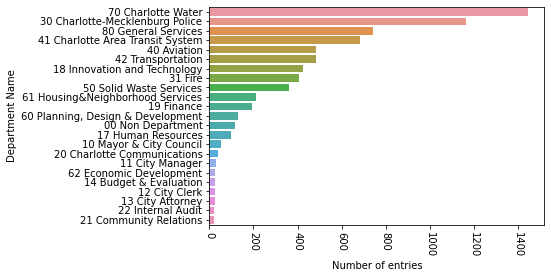

In [9]:
#Create countplot of amount of rows for each Department_Name
ax = sns.countplot(y='Department_Name', 
              data=df,
              order=df['Department_Name'].value_counts().index)
ax.set(xlabel='Number of entries', ylabel='Department Name')
plt.xticks(rotation=-90)
plt.show()

In [10]:
#Grouped rows by department and summed Adopted_Budget
df.groupby(['Department_Name'])['Adopted_Budget'].sum()

Department_Name
00 Non Department                    547688917
10 Mayor & City Council                 759531
11 City Manager                        2684177
12 City Clerk                           972432
13 City Attorney                       6518296
14 Budget & Evaluation                 2305100
17 Human Resources                     7114797
18 Innovation and Technology          50884149
19 Finance                            15947553
20 Charlotte Communications            4287722
21 Community Relations                 1707054
22 Internal Audit                      1477072
30 Charlotte-Mecklenburg Police      293839086
31 Fire                              138026767
40 Aviation                          372934320
41 Charlotte Area Transit System     361014658
42 Transportation                     65972808
50 Solid Waste Services               69427997
60 Planning, Design & Development     11863911
61 Housing&Neighborhood Services      22904504
62 Economic Development                63521

In [11]:
#Test to sort values of Adopted_Budget
#df = df.sort_values('Adopted_Budget')

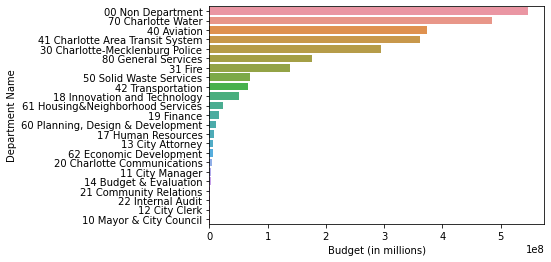

In [12]:
8#Create barplot of Department_Name sorted by Adopted_Budget

ax = sns.barplot(y='Department_Name',
            x='Adopted_Budget',
            data=df,
            ci=None,
            estimator=sum,
            order=df.groupby('Department_Name').agg('sum').sort_values(by='Adopted_Budget',ascending=False).index
            )
ax.set(xlabel='Budget (in millions)', ylabel='Department Name')
plt.show()

In [13]:
#Get sum, mean, and median of '41 Charlotte Area Transit System'
p = df.groupby('Department_Name')
p_transit = p.get_group('41 Charlotte Area Transit System')
print('sum:', p_transit.Adopted_Budget.sum())
print('mean:', p_transit.Adopted_Budget.mean())
print('median:', p_transit.Adopted_Budget.median())

sum: 361014658
mean: 527028.697810219
median: 12816.0


In [14]:
#Get CLT transit budget and sum by Object_Name
transit_budget = p_transit.groupby('Object_Name', as_index=False).Adopted_Budget.sum()
transit_budget


,Object_Name,Adopted_Budget
0,510100 Salaries & Wages - Regular,33254734
1,510110 Admin & Clerical Salaries,886044
2,510120 Transp - Wages & Salaries,26223627
3,510130 Maint - Wages & Salaries,8943058
4,510140 Overtime,4824656
...,...,...
70,540120 Lease/Purch Agr-Principal,39455194
71,540130 Lease/Purch Agr-Interest,11293120
72,540140 Other Debt Srvc Chrgs,114000
73,550100 Fund Transfers,134447263


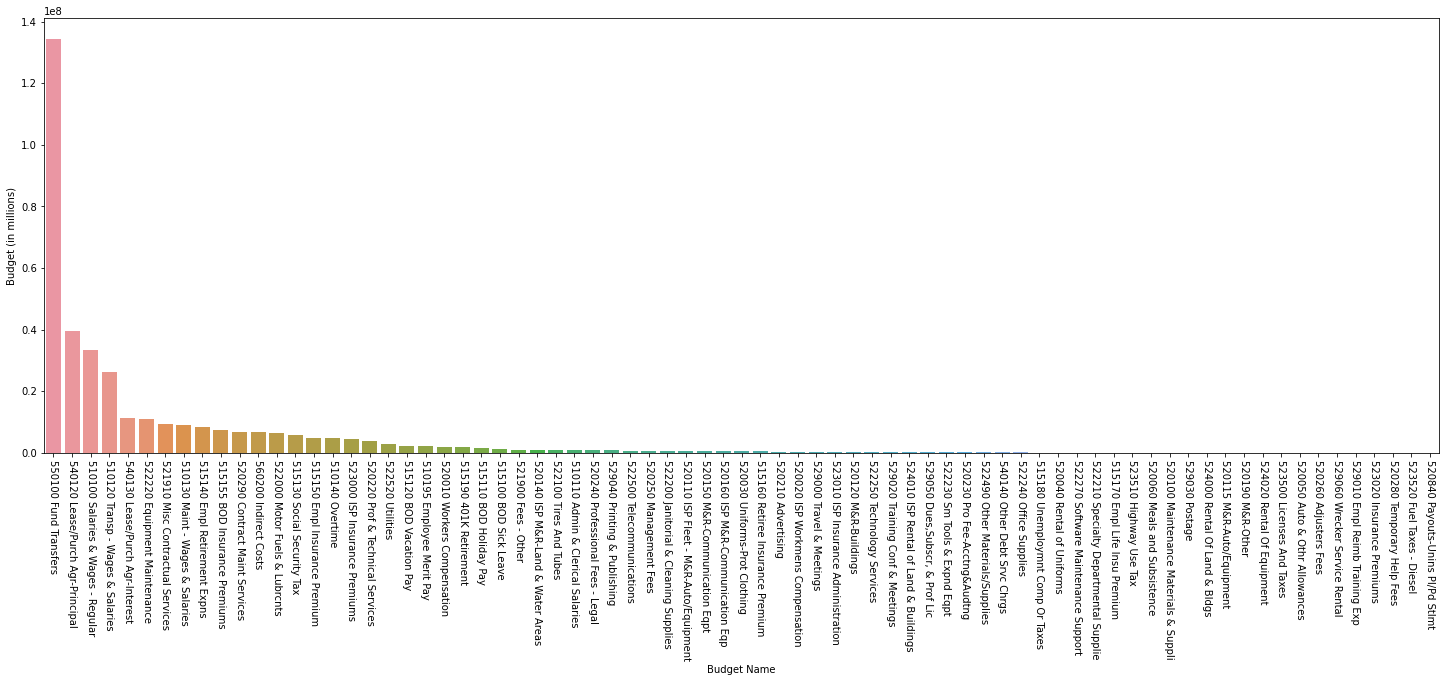

In [19]:
#Display transit budget graphically
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Adopted_Budget',
            x='Object_Name',
            data=transit_budget,
            ci=None,
            estimator=sum,    
            ax=ax,    
            order=transit_budget.groupby('Object_Name').agg('sum').sort_values(by='Adopted_Budget',ascending=False).index                                     
            )
ax.set(xlabel='Budget Name', ylabel='Budget (in millions)')
plt.xticks(rotation=-90)
plt.show()